In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
clf = clf.fit(iris.data, iris.target)
from sklearn.model_selection import train_test_split

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing Dataset

In [15]:
df = pd.read_csv('churn.csv')

# EDA

In [16]:
df.head()
df.tail()
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
1,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
2,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
3,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
4,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No
7028,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
7029,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
7030,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
7031,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# DUMMY CODING 

In [17]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical(df[col]).codes

# Creating dependent variable

In [12]:
X=churn.drop(['Churn'],1)

In [ ]:
X

In [18]:
y=df['Churn']

# Creating Train-Test Split

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=123)

In [172]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(5977, 19)

(1055, 19)

(5977,)

(1055,)

# Importing Decision Tree a creating instance for it

In [174]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,y)

In [175]:
import os

os.environ["PATH"]+=os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [176]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [177]:
import graphviz
dot_data1 = tree.export_graphviz(clf, out_file='treechurn1.dot',
                                feature_names=X.columns,
                                rounded=True,
                                filled=True,special_characters=True)


# Hyperparameter tuning using cross validation and gridsearch


In [178]:
creterian = ['gini','entropy']
min_samples_split = [2,10,20,50, 100]
max_depth = [10,20,30,40]

In [179]:
clf.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [180]:
params_grid = {'criterion':creterian, 'min_samples_split': min_samples_split ,  'max_depth': max_depth}

In [187]:
dt_g = GridSearchCV(clf, params_grid,n_jobs=-1, cv=5,verbose=3, scoring='accuracy')
dt_g.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   17.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [188]:
dt_g.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
dt_g.best_score_

0.32551194539249145

In [190]:
dt_g.best_index_

24

In [191]:
cv = pd.DataFrame(dt_g.cv_results_)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessi

0.837914691943128

             precision    recall  f1-score   support

          0       0.94      0.85      0.89       841
          1       0.57      0.78      0.66       214

avg / total       0.86      0.84      0.85      1055

Confussion Matrix


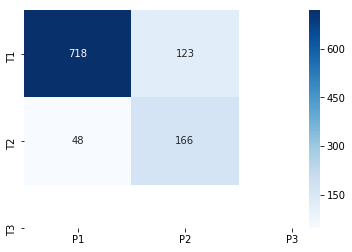

In [192]:
predicted = dt_g.predict(X_test)
metrics.accuracy_score(predicted, y_test)
print(metrics.classification_report(predicted, y_test))

# Confussion Matrix
print('Confussion Matrix')
cf = metrics.confusion_matrix(predicted,y_test)
lb11 = ['P1', 'P2', 'P3']
lb12 = ['T1', 'T2', 'T3']
sns.heatmap(cf, annot=True,cmap = 'Blues',fmt ='d',xticklabels = lb11, yticklabels = lb12)
plt.show()

In [194]:
cv.to_csv('CV_Results_churn.csv')